In [68]:
from bs4 import BeautifulSoup
import requests
import os
from selenium import webdriver
import pandas as pd
import numpy as np
import time
from splinter import Browser
import webbrowser
import matplotlib.pyplot as plt
import date



In [2]:
# #scrolling working DO NOT DELETE!

# def allMusicWebscrape():
    
#     browser = Browser('chrome', executable_path="chromedriver", headless=False)
#     top_songs_url = "https://soundcloud.com/charts/top?genre=all-music&country=US"
#     browser.visit(top_songs_url)

#     lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
#     match=False

#     while(match==False):
#             lastCount = lenOfPage
#             time.sleep(3)
#             lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
#             if lastCount==lenOfPage:
#                 match=True
#                 html = browser.html
#                 soup = BeautifulSoup(html, 'html.parser')
#                 topChart = soup.find('div', class_='chartTracks lazyLoadingList')
#                 songs = topChart.find_all('li', class_='chartTracks__item')

#                 songNames = []
#                 chartPosition = []
#                 artists = []
#                 weeklyListenCount = []
#                 allTimeListenCount = []

#                 for song in songs:

#                         position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
#                         positionNumber = position.text.strip()
#                         chartPosition.append(positionNumber)

#                         trackDetails = song.find('div', class_ = 'chartTrack__details')
#                         artistName = song.find(class_='sc-link-light')
#                         names = artistName.text.strip()
#                         cleanedNames = names.replace('\x7f',"")
#                         artists.append(cleanedNames)

#                         weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
#                         weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
#                         weeklyListenCount.append(weeklyPlayAmount)

#                         songName = song.find(class_="sc-link-dark")
#                         nameText = songName.text.strip()
#                         songNames.append(nameText)

#                         allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
#                         allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
#                         allPlayAmount = allPlayHiddenScore.text.strip()
#                         allTimeListenCount.append(allPlayAmount)

#     allMusicDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
#                                               columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
#     allMusicDataFrame.set_index('Chart Position', inplace=True)
#     allMusicDataFrame['Genre'] = 'All Music'
#     allMusicDataFrame


In [3]:
# def MusicWebscrape():
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=all-music&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)

worldMusicDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
worldMusicDataFrame.set_index('Chart Position', inplace=True)
worldMusicDataFrame['Genre'] = 'World Music'

In [4]:
worldMusicDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,FEFE (Feat. Nicki Minaj & Murda Beatz),6IX9INE,2984476,21657744,World Music
2,Lucid Dreams,Juice WRLD,2509730,82524103,World Music
3,Taking A Walk (Prod. Scott Storch),Trippie Redd,2013686,5110628,World Music
4,XXXTENTACION - Fuck Love (feat. Trippie Redd),XXXTENTACION,1483624,145198973,World Music
5,All Girls Are The Same,Juice WRLD,1424083,64094597,World Music
6,I Kill People! ft Tadoe & Chief Keef [Produced...,Trippie Redd,1397070,30513431,World Music
7,Lean Wit Me,Juice WRLD,1299741,13457564,World Music
8,Missing My Idols,Trippie Redd,1189137,2398210,World Music
9,Wasted (feat. Lil Uzi Vert),Juice WRLD,1133934,9629009,World Music


In [5]:
#alternative rock
    
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=alternativerock&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)

altRockDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
altRockDataFrame.set_index('Chart Position', inplace=True)
altRockDataFrame['Genre'] = 'Alternative Rock'
altRockDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,Emperor's New Clothes,Panic! At The Disco,39619,13262080,Alternative Rock
2,Don't Threaten Me With A Good Time,Panic! At The Disco,31817,7247665,Alternative Rock
3,Victorious,Panic! At The Disco,29220,9807498,Alternative Rock
4,LA Devotee,Panic! At The Disco,23156,6035278,Alternative Rock
5,cavetown - this is home/cut my hair 🥀,sadvibesonly,21145,931298,Alternative Rock
6,Paramore - Still Into You,Fueled By Ramen,15970,5795235,Alternative Rock
7,XXXTENTACION - Changes,TresJulian,14048,566932,Alternative Rock
8,Green Day - Basket Case,BURGER RECORDS,12244,6649020,Alternative Rock
9,Pierce The Veil - King for a Day ft. Kellin Quinn,JorGeHL',11605,9538994,Alternative Rock


In [6]:
#ambient
    
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=ambient&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)

ambientDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
ambientDataFrame.set_index('Chart Position', inplace=True)
ambientDataFrame['Genre'] = 'Ambient'
ambientDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,Relaxing Rain and Loud Thunder (Free Field Rec...,R.J. Stefanski,50735,2936127,Ambient
2,The Eden Project - Circles,SyrebralVibes,21112,10450948,Ambient
3,30 Minute Deep Sleep Music-Calming Music Relax...,T Mega,16395,4075008,Ambient
4,Alina Baraz & Galimatias - Pretty Thoughts,Galimatias,15593,14862925,Ambient
5,Marconi Union - Weightless,Just Music Label,8616,8268223,Ambient
6,Reiki Zen Meditation Music | Relax your Mind a...,Spiritual Moment,8613,5695506,Ambient
7,"Relaxing Rain and Thunder Sound , Sleep Medita...",Ibne Waheedi,8497,3669860,Ambient
8,idealism x yutaka hirasaka - tasogare,idealism,6820,24585,Ambient
9,Illenium - With You ft. Quinn XCII,Your Secret,6769,5332488,Ambient


In [7]:
#classical

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=classical&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)
        
classicalDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
classicalDataFrame.set_index('Chart Position', inplace=True)
classicalDataFrame['Genre'] = 'Classical'
classicalDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,Epianisi,Password,29532,93973,Classical
2,Epianisa,Password,27831,94033,Classical
3,Epianish,Password,27690,91401,Classical
4,Epianisu,Password,27521,93209,Classical
5,As she passes,Levi Patel,7742,3810990,Classical
6,Clair de Lune,Claude Debussy,6664,1800502,Classical
7,Brahms Lullaby And White Noise Ocean Waves,"Fireheart Music, Inc",5682,188296,Classical
8,Beethoven - Moonlight Sonata (Glenn playing on...,Glenn Morrison,5511,4726850,Classical
9,song of storms piano again,lilypichu,4628,1849480,Classical


In [8]:
#COUNTRY
    
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=country&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)
                    
countryDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
countryDataFrame.set_index('Chart Position', inplace=True)
countryDataFrame['Genre'] = 'Country'
countryDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,YBN Nahmir - Pain Away (feat. YBN Cordae),COMETHAZINE,373482,1490962,Country
2,Juice WRLD - Bottle,Juice WRLD,190096,889796,Country
3,haunt u w/lil peep,mysticphonk,78090,5066932,Country
4,The Middle,Zedd,73583,8713066,Country
5,Juice WRLD - Nascar (feat. LIL DURK),Juice WRLD,55072,276415,Country
6,BIG CHILD SUPPORT & LIL ROCKSTAR - PUT IN WORK,ㅤㅤ,50941,319459,Country
7,Tequila,Dan + Shay,44494,1446800,Country
8,Sad Nigga Hours (Prod. 904TEZZO),Lil Boom,43032,3669895,Country
9,Juice WRLD - Plug,Juice WRLD,42926,119245,Country


In [9]:
#edm
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=danceedm&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)

edmDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
edmDataFrame.set_index('Chart Position', inplace=True)
edmDataFrame['Genre'] = 'Electronic Dance Music (EDM)'
edmDataFrame


,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,Onderkoffer x SWACQ - Bankai | OUT NOW!,Metanoia Music,79101,738503,Electronic Dance Music (EDM)
2,"2F Big Bootie Mix, Volume 11 - Two Friends",Two Friends Big Bootie Mixes,68654,6711623,Electronic Dance Music (EDM)
3,"2F Big Bootie Mix, Volume 13 - Two Friends",Two Friends Big Bootie Mixes,65267,3072898,Electronic Dance Music (EDM)
4,SLANDER & CRANKDAT - KNEEL BEFORE ME FT. ASKIN...,SLANDER,62324,245665,Electronic Dance Music (EDM)
5,Alone (Original Mix),marshmello,53223,41410964,Electronic Dance Music (EDM)
6,Faded - Alan Walker - DEFΛLT Edit (Extended E...,DEFΛLT,52951,40718676,Electronic Dance Music (EDM)
7,Martin Garrix & Bebe Rexha - In The Name Of Love,Martin Garrix,51250,54588810,Electronic Dance Music (EDM)
8,The Chainsmokers - Don't Let Me Down (Illenium...,ILLENIUM,44406,96730638,Electronic Dance Music (EDM)
9,KAYZO & GAMMER - FOREVER,KAYZO,37374,127334,Electronic Dance Music (EDM)


In [10]:
#dancehall - Issues with this one

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=dancehall&country=US"
browser.visit(top_songs_url)

# lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
# match=False

while(match==False):
    try:
        time.sleep(20)
        lastCount = lenOfPage
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')
            
            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []
            
            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)
    except:
        print("Genre not found, skipping...")
        pass
    
danceHallDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
danceHallDataFrame.set_index('Chart Position', inplace=True)
danceHallDataFrame['Genre'] = 'Dance Hall'
danceHallDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,Onderkoffer x SWACQ - Bankai | OUT NOW!,Metanoia Music,79101,738503,Dance Hall
2,"2F Big Bootie Mix, Volume 11 - Two Friends",Two Friends Big Bootie Mixes,68654,6711623,Dance Hall
3,"2F Big Bootie Mix, Volume 13 - Two Friends",Two Friends Big Bootie Mixes,65267,3072898,Dance Hall
4,SLANDER & CRANKDAT - KNEEL BEFORE ME FT. ASKIN...,SLANDER,62324,245665,Dance Hall
5,Alone (Original Mix),marshmello,53223,41410964,Dance Hall
6,Faded - Alan Walker - DEFΛLT Edit (Extended E...,DEFΛLT,52951,40718676,Dance Hall
7,Martin Garrix & Bebe Rexha - In The Name Of Love,Martin Garrix,51250,54588810,Dance Hall
8,The Chainsmokers - Don't Let Me Down (Illenium...,ILLENIUM,44406,96730638,Dance Hall
9,KAYZO & GAMMER - FOREVER,KAYZO,37374,127334,Dance Hall


In [11]:
#deephouse

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=deephouse&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)
        
deepHouseDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
deepHouseDataFrame.set_index('Chart Position', inplace=True)
deepHouseDataFrame['Genre'] = 'Deep House'
deepHouseDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,Matt Simons - Catch & Release (Deepend Remix) ...,Deepend,24117,32047735,Deep House
2,The Anjunadeep Edition 214 with Lane 8,Anjunadeep,12141,37103,Deep House
3,MÖWE - Birds Flying High (FREE Download),MÖWE,11859,11028838,Deep House
4,Antoine Chambe - Dream Of Me,Tech Me House,10243,2686643,Deep House
5,Deep Chills - Blinded (feat. Emma Carn) [FREE ...,Miami Beats,7828,7971817,Deep House
6,Alok & Sevenn - BYOB [ FREE DOWNLOAD ],[ FREE DL ],6855,27705104,Deep House
7,Mr. Probz - Nothing Really Matters (Kav Verhou...,KAV VERHOUZER,5872,10320747,Deep House
8,Robin Schulz - Sugar (EDX's Ibiza Sunrise Remix),EDX,5575,11762282,Deep House
9,Summer Special Super Mix 2018 - Best Of Deep H...,ᴰᴶ Drop G,5333,1206406,Deep House


In [12]:
#disco

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=disco&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)
        
discoDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
discoDataFrame.set_index('Chart Position', inplace=True)
discoDataFrame['Genre'] = 'Disco'
discoDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,datfootdive - ”ｓｔａｙ”,Future Society,3326,1051444,Disco
2,Ariana Grande - Touch It (Slipenberg Remix)(FR...,Spirit Soul Mixes & Free Downloads,2163,2746941,Disco
3,Aritus - Keep,Aritus 🌸,1754,761460,Disco
4,Estilo Disco: 70s Disco Megamix Boite Discotheque,Mix80s,1407,2428253,Disco
5,Moe Shop - Waifu Material Mixtape,Future Society,999,545634,Disco
6,Poolside - Contact High Mixtape,Poolside,816,567349,Disco
7,Kris Santiago - Sexy Buegel Bretter Mix 33 (Sa...,Kris Santiago I NDYD,788,54294,Disco
8,Lovestruck feat. Holland Greco,Funk LeBlanc,716,26936,Disco
9,Get down Saturday night - Oliver Cheatham - Sa...,SanFranDisko,678,186028,Disco


In [13]:
#drumbass

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=drumbass&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)
                    
drumBassDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
drumBassDataFrame.set_index('Chart Position', inplace=True)
drumBassDataFrame['Genre'] = 'Drum Bass'
drumBassDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,Cartoon - Why We Lose (feat. Coleman Trapp) [N...,NCS,16932,9658595,Drum Bass
2,Fox Stevenson - Bruises,Pilot.,7738,32804,Drum Bass
3,Delta Heavy - White Flag,DELTΔ HEΔVY,5643,734183,Drum Bass
4,Feint - We Won't Be Alone (feat. Laura Brehm),Monstercat,5433,4046419,Drum Bass
5,a-ha - Take On Me (Milkshake's Silly DnB Mix),MilkshakeManCP,4420,909730,Drum Bass
6,Feint - Snake Eyes (feat. CoMa),Monstercat,4072,2884164,Drum Bass
7,Delta Heavy - Ghost (Zomboy Remix) [Nest HQ Pr...,DELTΔ HEΔVY,2981,2933959,Drum Bass
8,Delta Heavy - I Need You,Monstercat,2634,629822,Drum Bass
9,Feint - Words (feat. Laura Brehm),Monstercat,2144,1553415,Drum Bass


In [14]:
#dubstep
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=dubstep&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)
                    
dubStepDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
dubStepDataFrame.set_index('Chart Position', inplace=True)
dubStepDataFrame['Genre'] = 'Dubstep'
dubStepDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,Excision & Dion Timmer - Home,Excision,49659,80622,Dubstep
2,Excision & Dion Timmer - Where Are You,Excision,36066,60575,Dubstep
3,Skrillex & Rick Ross - Purple Lamborghini,Skrillex,31967,29895760,Dubstep
4,Excision & Space Laces - Rumble,Excision,29654,846201,Dubstep
5,Liquid Stranger - Gunslinger feat. Pistol,Wakaan,24771,58252,Dubstep
6,Excision & Dion Timmer - Hoods Up feat. Messinian,Excision,24662,388739,Dubstep
7,MONXX - HUMAN MUSIC (100k FREEBIE),MONXX,24358,43976,Dubstep
8,Excision - Lost Lands 2017 Mix,Excision,22862,17878026,Dubstep
9,Skrillex & Poo Bear - Would You Ever,Skrillex,21167,7697109,Dubstep


In [15]:
#electronic
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=electronic&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)
                    
electronicDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
electronicDataFrame.set_index('Chart Position', inplace=True)
electronicDataFrame['Genre'] = 'Electronic'
electronicDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,ghost girl (prod. lederrick),☆LiL PEEP☆,118229,10766493,Electronic
2,Excision x Illenium - Gold (Stupid Love) feat ...,Excision,82999,768344,Electronic
3,Excision & Sullivan King - Wake Up,Excision,63161,103683,Electronic
4,Sunset Lover,PETIT BISCUIT,49511,33150421,Electronic
5,Excision - Exterminate,Excision,48952,81662,Electronic
6,Excision - Tonight,Excision,43508,67434,Electronic
7,Excision - Vault,Excision,40649,65094,Electronic
8,Feel Good Inc.,Everything Gorillaz - P2,40484,11681650,Electronic
9,Major Lazer & DJ Snake - Lean On (feat. MØ),Major Lazer [OFFICIAL],39120,192075141,Electronic


In [16]:
#folk
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=folksingersongwriter&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)

folkDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
folkDataFrame.set_index('Chart Position', inplace=True)
folkDataFrame['Genre'] = 'Folk'
folkDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,ILLENIUM - Take You Down,ILLENIUM,53726,354717,Folk
2,feelings are fatal,mxmtoon,18872,998365,Folk
3,A Song About Being Sad,Rex Orange County,18231,1445833,Folk
4,Happy Now,Zedd,17557,172794,Folk
5,Wake Up,EDEN,11733,4696437,Folk
6,crash,EDEN,10714,1631109,Folk
7,Fumes (feat. gnash),EDEN,10320,6981101,Folk
8,End Credits (Feat. Leah Kelly),EDEN,10318,6402003,Folk
9,Marshmello - Silence ft. Khalid (Illenium Remix),ILLENIUM,10056,2535953,Folk


In [17]:
#HH
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=hiphoprap&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)

hipHopDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
hipHopDataFrame.set_index('Chart Position', inplace=True)
hipHopDataFrame['Genre'] = 'Hip-Hop'
hipHopDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,FEFE (Feat. Nicki Minaj & Murda Beatz),6IX9INE,2984476,21662946,Hip-Hop
2,Lucid Dreams,Juice WRLD,2509730,82528069,Hip-Hop
3,Taking A Walk (Prod. Scott Storch),Trippie Redd,2013686,5113246,Hip-Hop
4,XXXTENTACION - Fuck Love (feat. Trippie Redd),XXXTENTACION,1483624,145201270,Hip-Hop
5,All Girls Are The Same,Juice WRLD,1424083,64096678,Hip-Hop
6,I Kill People! ft Tadoe & Chief Keef [Produced...,Trippie Redd,1397070,30515590,Hip-Hop
7,Lean Wit Me,Juice WRLD,1299741,13459701,Hip-Hop
8,Missing My Idols,Trippie Redd,1189137,2399638,Hip-Hop
9,Wasted (feat. Lil Uzi Vert),Juice WRLD,1133934,9630623,Hip-Hop


In [18]:
#House
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=house&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)
        
houseDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
houseDataFrame.set_index('Chart Position', inplace=True)
houseDataFrame['Genre'] = 'House'
houseDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,Fox Stevenson - Bulgogi | OUT NOW!,Metanoia Music,36165,773023,House
2,Kid Cudi - Pursuit of Happiness (Steve Aoki Re...,Steve Aoki,28501,34078274,House
3,"2F Big Bootie Mix, Volume 10 - Two Friends",Two Friends Big Bootie Mixes,27446,4970670,House
4,BASS CLAWS [Buygore],SPAG HEDDY,19397,50846,House
5,Sikdope & ZOOTAH - Bubblegum,Sikdope,18434,142348,House
6,REZZ x 1788-L - H E X,REZZ,17797,460628,House
7,FISHER - Losing It,FISHER,17496,465826,House
8,Felguk x Boogshe - Pretty Baby | OUT NOW!,Metanoia Music,15709,265058,House
9,Snails - Russian Roulette (feat. Panther Matum...,MEGALODON,14598,64148,House


In [19]:
#indie
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=indie&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)
        
indieDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
indieDataFrame.set_index('Chart Position', inplace=True)
indieDataFrame['Genre'] = 'Indie'
indieDataFrame


,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,drugs,EDEN,20857,7048225,Indie
2,Mac DeMarco // My Kind of Woman,capturedtracks,19056,5498704,Indie
3,such sad songs,atlas,12571,97498,Indie
4,summer depression,girl in red,11533,667056,Indie
5,Mac DeMarco // Ode to Viceroy,capturedtracks,8630,4111226,Indie
6,and,EDEN,6380,2359260,Indie
7,Yam Yam,No Vacation,5930,599479,Indie
8,K.,Cigarettes After Sex,5637,2372494,Indie
9,Dræm Girl,No Vacation,5622,1340928,Indie


In [20]:
#jazz

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=jazzblues&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)

jazzDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
jazzDataFrame.set_index('Chart Position', inplace=True)
jazzDataFrame['Genre'] = 'Jazz'
jazzDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,Black Coffee,Edo Lee 🌾,12230,3643605,Jazz
2,Frank Sinatra - Fly Me To The Moon,Jacarandá,9145,4522730,Jazz
3,Steven Universe - Love Like You - Full Edit (C...,PhizzyPhizzy,8148,1324944,Jazz
4,Louis Armstrong - La Vie En Rose,Miri Meri,4787,7103907,Jazz
5,Fly Me To The Moon @Neon Genesis Evangelion,Angel3mil,3297,346131,Jazz
6,Big Band | Live @ St. John Village 2018,Marvelus Production Team,3148,58800,Jazz
7,Frank Sinatra - New York New York,Rob Noordeloos,2510,858446,Jazz
8,Smooth And Sexy - Smooth Jazz For Lovers,Mukunda M'Tandari,2078,1083552,Jazz
9,"Smooth jazz music ( instrumental music, piano ...",JWilborn,2058,1188466,Jazz


In [21]:
#latin

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=latin&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)
        
latinDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
latinDataFrame.set_index('Chart Position', inplace=True)
latinDataFrame['Genre'] = 'Latin'
latinDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,Ozuna - Tu Foto,FUTURE TRAP ✅,122426,31317756,Latin
2,SOY PEOR - BAD BUNNY,TRAP KINGZ ✅,106452,46263423,Latin
3,Ozuna - Se Preparo,The Trap House ✅,103544,25787382,Latin
4,BEBE - Ozuna Ft Anuel AA,TRAP MUSIC ✅,102956,21515361,Latin
5,ME MATA - Bad Bunny ❌ Brytiago ❌ Noriel ❌ Arca...,TRAP HOUSE ✅,63940,26512282,Latin
6,ME ACOSTUMBRE - ARCANGEL ❌ BAD BUNNY,DRAKE - IN MY FEELINGS - KIKI! DO YOU LOVE ME!,63596,19713022,Latin
7,Farruko ❌ Bad Bunny - Krippy Kush,TRAP FM ✅,57870,23802394,Latin
8,Sobredosis - Romeo Santos ❌ Ozuna,TRAP FM ✅,51516,8080191,Latin
9,PA TI - Bad Bunny ❌ Bryant Myers,RD Urbans Music ✅,50671,26068853,Latin


In [22]:
#metal

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=metal&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)
                    
metalDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
metalDataFrame.set_index('Chart Position', inplace=True)
metalDataFrame['Genre'] = 'Metal'
metalDataFrame


,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,Slipknot - The Devil In I,Roadrunner USA,12726,7699062,Metal
2,"CRUCIFY THY INFANT, SON OF WHORE (FT. XXXTENTA...",CRAIG XEN,8389,2113866,Metal
3,Metallica - Enter sandman,Metal Head0,8329,2914417,Metal
4,Slipknot - (Sic),Roadrunner Records,6482,4047192,Metal
5,Under And Over It – Five Finger Death Punch,Mahdokht Az,5867,2401036,Metal
6,Slipknot Before I Forget,Jhon Agudelo 1,5303,4108113,Metal
7,Killswitch Engage - My Curse,Roadrunner USA,4392,2085415,Metal
8,Master Of Puppets (From the Motion Picture Met...,Metallica,3951,4720883,Metal
9,Metallica - Wherever i may roam,Metal Head0,3649,1935253,Metal


In [23]:
#piano

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=piano&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)

pianoDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
pianoDataFrame.set_index('Chart Position', inplace=True)
pianoDataFrame['Genre'] = 'Piano'
pianoDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,Yiruma - River flows in you,Awful Piano Sound,8638,11793685,Piano
2,Yann Tiersen - Amélie Soundtrack (Piano Version),Giorgio Iannelli,3975,7124834,Piano
3,The Hanging Tree from The Hunger Games: Mockin...,starwarspunk,2611,3816796,Piano
4,凛として時雨 - Unravel (piano Cover) [Tokyo Ghoul OP],aouysdgfahsbdfiwegdfsesuf,2437,1338683,Piano
5,BTS (방탄소년단) 'Epiphany' - Full Piano Cover,Smyang,2336,22298,Piano
6,[FULL] BTS '봄날 (Spring Day)' - Piano Cover,Smyang,2305,1050991,Piano
7,Titanic Instrumental,KarthikKrishTunes,2303,3000361,Piano
8,Yann Tiersen – Comptine d’un autre été – L’apr...,reminiscience,2280,4342123,Piano
9,Tea Leaves At The Botton Of A Cup,Bruno Sanfilippo,1640,577832,Piano


In [24]:
#pop    
    
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=pop&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)      

popDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
popDataFrame.set_index('Chart Position', inplace=True)
popDataFrame['Genre'] = 'Pop'
popDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,How You Feel,Trippie Redd,365788,2532806,Pop
2,lovely,Billie Eilish,310278,6534661,Pop
3,Underwater Flyzone,Trippie Redd,296444,694740,Pop
4,1-800-273-8255 (feat. Alessia Cara & Khalid),Logic,183789,48579397,Pop
5,skin,XXXTENTACION,157199,17666373,Pop
6,Trippie Redd - Together / Bigger Than Satan (o...,O H W,125249,2275506,Pop
7,XXXTENTACION - changes (Cover),Joshua Perez,117522,10671535,Pop
8,BAD BUNNY - AMOR FODA,TRAP KINGZ ✅,116667,34215347,Pop
9,Ocean Eyes,Billie Eilish,112689,6649162,Pop


In [25]:
#rnbsoul

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=rbsoul&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)
                    
rnbDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
rnbDataFrame.set_index('Chart Position', inplace=True)
rnbDataFrame['Genre'] = 'R&B'
rnbDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,Boo'd Up,Ella Mai,617524,28374281,R&B
2,King Of My Own [click the like and repost butt...,SFiremusic,489248,52274634,R&B
3,Love Scars/You hurt me [Produced by: Elliott T...,Trippie Redd,475136,62978765,R&B
4,Karma,Queen Naija,459946,6164478,R&B
5,Medicine,Queen Naija,427606,40082465,R&B
6,Trippie Redd & Chief Keef - BILAP [Produced by...,Trippie Redd,401886,3448922,R&B
7,Butterflies,Queen Naija,327837,1500529,R&B
8,YNW Melly - 772 Love (OFFICIAL AUDIO)Prod By; ...,YNW MUSIC,296201,4282718,R&B
9,Trip,Ella Mai,289995,680546,R&B


In [26]:
#reggae

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=reggae&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)
        
reggaeDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
reggaeDataFrame.set_index('Chart Position', inplace=True)
reggaeDataFrame['Genre'] = 'Reggae'
reggaeDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,Bob Marley Is this Love (Dubmatix Re-Visioned),dubmatix,8693,13245279,Reggae
2,Kolohe Kai - Heartstrings,DesraeAndon,7702,297297,Reggae
3,Smokin' Love (feat. Collie Buddz),Stick Figure,7222,4479097,Reggae
4,Adele | Set Fire To The Rain ( Reggae Version ...,Yara Y. Ahmed,6169,12894878,Reggae
5,Who Knows ft. Chronixx,Protoje,5396,6458572,Reggae
6,Roots Reggae Music (Feat. Don Carlos),Rebelution,5309,3544118,Reggae
7,Old School Reggae Mix,DJ Quix,4107,4010429,Reggae
8,Bob Marley - Is This Love (Soke Remix) **FREE ...,ReggaeRoast,3862,4090221,Reggae
9,Mr Vegas - Bruk It Down,ᴅᴏᴜʙʟᴇ ᴊᴀʏ,3755,541213,Reggae


In [67]:
#reggaeton

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=reggaeton&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)
        
reggaetonDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
reggaetonDataFrame.set_index('Chart Position', inplace=True)
reggaetonDataFrame['Genre'] = 'Reggaeton'
reggaetonDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,TE BOTE REMIX (ORIGINAL) - NIO GARCIA FT OZUNA...,RD Urbans Music ✅,150354,13328603,Reggaeton
2,No Quiere Enamorarse,Ozuna,65107,29212340,Reggaeton
3,cual es tu plan❌Anuel aa❌Brindemos❌bad bunny❌o...,48 Laws,56456,8477638,Reggaeton
4,J Balvin Ft. Bad Bunny - Si Tu Novio Te Deja S...,DyAze,46692,16171412,Reggaeton
5,"Sola (Official Remix) (Ft. Farruko, Daddy Yank...",Anuel_AA,44680,15820603,Reggaeton
6,"Ella y Yo Remix ft. Farruko , Ozuna , Arcangel...",Pepe Quintana,43633,19850130,Reggaeton
7,ANUEL AA FT BAD BUNNY - VAMOS PA LA CALLE,RD Urbans Music ✅,36235,7227758,Reggaeton
8,Ozuna Ft. Farruko & Arcangel - Si No Te Quiere...,The Punchline,34228,24453184,Reggaeton
9,Ozuna - Si Te Dejas Llevar (feat. Juanka El Pr...,Nelaion Music,30591,14574559,Reggaeton


In [28]:
#rock
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=rock&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
    try:
        time.sleep(20)
        lastCount = lenOfPage
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')
            
            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []
            
            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)
    except:
        print("Genre not found, skipping...")
        pass
                    
rockDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
rockDataFrame.set_index('Chart Position', inplace=True)
rockDataFrame['Genre'] = 'Rock'
rockDataFrame


# while(match==False):
#         lastCount = lenOfPage
#         time.sleep(3)
#         lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
#         if lastCount==lenOfPage:
#             match=True
#             html = browser.html
#             soup = BeautifulSoup(html, 'html.parser')
#             topChart = soup.find('div', class_='chartTracks lazyLoadingList')
#             songs = topChart.find_all('li', class_='chartTracks__item')

#             songNames = []
#             chartPosition = []
#             artists = []
#             weeklyListenCount = []
#             allTimeListenCount = []

#             for song in songs:

#                     position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
#                     positionNumber = position.text.strip()
#                     chartPosition.append(positionNumber)

#                     trackDetails = song.find('div', class_ = 'chartTrack__details')
#                     artistName = song.find(class_='sc-link-light')
#                     names = artistName.text.strip()
#                     cleanedNames = names.replace('\x7f',"")
#                     artists.append(cleanedNames)

#                     weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
#                     weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
#                     weeklyListenCount.append(weeklyPlayAmount)

#                     songName = song.find(class_="sc-link-dark")
#                     nameText = songName.text.strip()
#                     songNames.append(nameText)

#                     allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
#                     allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
#                     allPlayAmount = allPlayHiddenScore.text.strip()
#                     allTimeListenCount.append(allPlayAmount)

# rockDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
#                               columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
# rockDataFrame.set_index('Chart Position', inplace=True)
# rockDataFrame['Genre'] = 'Rock'
# rockDataFrame

Genre not found, skipping...


,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,KING,XXXTENTACION,128058,17236093,Rock
2,sleep thru ur alarms,lontalius,48834,2911042,Rock
3,I Write Sins Not Tragedies,Panic! At The Disco,45001,17818908,Rock
4,Bones - LivingSucks (prod. by _____),TeamSESH,40715,84410,Rock
5,Zombie,Bad Wolves,30885,2113447,Rock
6,This Is Gospel,Panic! At The Disco,28957,18729900,Rock
7,In The End,LINKIN_PARK,28561,10116754,Rock
8,The White Stripes - Seven Nation Army (The Gli...,The Glitch Mob,26174,17852610,Rock
9,Tongue Tied - Grouplove,Atlantic Records,22060,11434434,Rock


In [29]:
#soundtrack

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=soundtrack&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)

soundtrackDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
soundtrackDataFrame.set_index('Chart Position', inplace=True)
soundtrackDataFrame['Genre'] = 'SoundTrack'
soundtrackDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,My Hero Academia OST - Track 1: You Say Run (T...,Zacky-San,31084,3225534,SoundTrack
2,OST Tokyo Ghoul [Opening full],Rapp_LK,19124,2017170,SoundTrack
3,Toby Fox - UNDERTALE Soundtrack - 100 MEGALOVANIA,angrysausage,13231,8287677,SoundTrack
4,"It's Over, Isn't It",STEVEN UNIVERSE,9865,1701615,SoundTrack
5,Super - Smash - Bros - Ultimate - Main - Theme...,Quentin Papyrus,9682,118435,SoundTrack
6,Turning Page,Sleeping At Last,9189,10635483,SoundTrack
7,Glassy Sky - Tokyo Ghoul √A - OST [FULL],OSTsbin,8661,2965098,SoundTrack
8,The Greatest Showman Original Soundtrack - All...,Wang Beibei,7193,1056361,SoundTrack
9,Toby Fox - UNDERTALE Soundtrack - 87 Hopes And...,angrysausage,6419,4272429,SoundTrack


In [30]:
#techno

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=techno&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)

technoDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
technoDataFrame.set_index('Chart Position', inplace=True)
technoDataFrame['Genre'] = 'Techno'
technoDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,Gammer and Kayzo Live from Brownies and Lemonade,Brownies and Lemonade,5421,145112,Techno
2,"Shiba San - ""Don't Talk"" [DIRTYBIRD]",DIRTYBIRD,4334,10430,Techno
3,Hentai - S3RL,S3RL,3717,1561253,Techno
4,DCR419 - Drumcode Radio Live - Adam Beyer live...,adambeyer,3713,20926,Techno
5,"Shiba San - ""Moskito"" [DIRTYBIRD]",DIRTYBIRD,3529,7583,Techno
6,In The MOOD - Episode 224 - LIVE from Resistan...,Nicole Moudaber,3375,10434,Techno
7,Nightcore - Listen to your heart,nightcore_Shark,2692,2276564,Techno
8,DCR418 - Drumcode Radio Live - Green Velvet St...,adambeyer,2427,33069,Techno
9,REZZ - Plague [NEST054],NEST HQ,2000,905672,Techno


In [31]:
#trap

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=trap&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)

trapDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
trapDataFrame.set_index('Chart Position', inplace=True)
trapDataFrame['Genre'] = 'Trap'
trapDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,Black Coast - TRNDSTTR (Lucian Remix) [feat. M...,Lucian,50914,42147903,Trap
2,Love Sosa (RL Grime Remix) - Chief Keef,RL Grime,49651,34296373,Trap
3,BRICKS (feat. Migos) [Original],Dj Carnage,34059,41532161,Trap
4,Chief Keef - Hate Being Sober - 50 Cent & Wiz ...,Marcus mj,32319,21514441,Trap
5,Diablita - Noriel Ft. Anuel AA Y Baby Rasta,Noriel,28659,13885688,Trap
6,Fetty Wap - Trap Queen (Crankdat Remix) ⚙,Crankdat,26609,52361422,Trap
7,Hermitude - The Buzz (feat. Mataya & Young Tapz),Thissongissick.com,19446,15408876,Trap
8,Praise The Lord (CRVE U & SKUM Remix),CRVE U,18670,49271,Trap
9,Rick And Morty - Evil Morty Theme Song Trap Remix,Trap Music HD,16246,3585886,Trap


In [32]:
#world

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=world&country=US"
browser.visit(top_songs_url)

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False

while(match==False):
        lastCount = lenOfPage
        time.sleep(3)
        lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
            html = browser.html
            soup = BeautifulSoup(html, 'html.parser')
            topChart = soup.find('div', class_='chartTracks lazyLoadingList')
            songs = topChart.find_all('li', class_='chartTracks__item')

            songNames = []
            chartPosition = []
            artists = []
            weeklyListenCount = []
            allTimeListenCount = []

            for song in songs:

                    position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
                    positionNumber = position.text.strip()
                    chartPosition.append(positionNumber)

                    trackDetails = song.find('div', class_ = 'chartTrack__details')
                    artistName = song.find(class_='sc-link-light')
                    names = artistName.text.strip()
                    cleanedNames = names.replace('\x7f',"")
                    artists.append(cleanedNames)

                    weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
                    weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
                    weeklyListenCount.append(weeklyPlayAmount)

                    songName = song.find(class_="sc-link-dark")
                    nameText = songName.text.strip()
                    songNames.append(nameText)

                    allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
                    allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
                    allPlayAmount = allPlayHiddenScore.text.strip()
                    allTimeListenCount.append(allPlayAmount)

worldDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                          columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
worldDataFrame.set_index('Chart Position', inplace=True)
worldDataFrame['Genre'] = 'World Music'
worldDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,Lil Baby - Never Needed No Help,Th3 PLug Radio 2,228707,1954913,World Music
2,Lil Baby - Southside,Th3 PLug Radio 2,110562,1683914,World Music
3,Radicamos En South Central - Fuerza Regida [In...,alejandro510,64261,2240610,World Music
4,xxxtentacion - $aUcE!,Brain Bakery Mag,64151,4900986,World Music
5,Kid Buu - Death To Soundcloud (Prod. Oohdem Be...,262 Magazine,50627,196222,World Music
6,تكبيرات العيد,takbeerat,44140,15150446,World Music
7,Adham Seliman - Ya Samra / أدهم سليمان - يا سمرا,Adham Seliman,28050,12563510,World Music
8,PACMAN*ft - The Exper-T & Wild Christopher - S...,*PACMAN*AKA*PAC*,26036,2278444,World Music
9,"A-Boogie ""WEAK DAYS""(Sza Weeknd Remix)",A BOOGIE WIT DA HOODIE,25916,1144350,World Music


In [40]:
df_final_combined = pd.concat([rockDataFrame, altRockDataFrame, ambientDataFrame,
                    classicalDataFrame, countryDataFrame, edmDataFrame, danceHallDataFrame, deepHouseDataFrame, 
                    discoDataFrame, drumBassDataFrame, dubStepDataFrame, electronicDataFrame, folkDataFrame, 
                    hipHopDataFrame, houseDataFrame, indieDataFrame, jazzDataFrame, latinDataFrame, metalDataFrame,
                    pianoDataFrame, popDataFrame, rnbDataFrame, reggaeDataFrame, reggaetonDataFrame,
                    soundtrackDataFrame, technoDataFrame, worldDataFrame])
df_final_combined


df_final_combined['Weekly Play Count'] = df_final_combined['Weekly Play Count'].astype(np.int64)
df_final_combined['All Time Play Count'] = df_final_combined['All Time Play Count'].astype(np.int64)

df_final_combined.dtypes

Song Name              object
Artist                 object
Weekly Play Count       int64
All Time Play Count     int64
Genre                  object
dtype: object

In [53]:
df_weeklyPlays = pd.DataFrame(df_final_combined.groupby(['Genre'])['Weekly Play Count'].sum().
                              sort_values(ascending=False))
final_weeklyPlaysdf = df_weeklyPlays.rename(columns={'Weekly Play Count':'weeklyPlays'})
final_weeklyPlaysdf

,weeklyPlays
Genre,
Hip-Hop,43903699
R&B,9492331
Pop,3758825
Latin,1861022
Country,1732593
Electronic,1522777
Dance Hall,1320940
Electronic Dance Music (EDM),1320940
Reggaeton,1299906


In [64]:
df_allTimePlays = pd.DataFrame(df_final_combined.groupby(['Genre'])['All Time Play Count'].sum().
                              sort_values(ascending=False))

final_allTimePlaysdf = df_allTimePlays.rename(columns={'All Time Play Count':'allTimePlays'})
final_allTimePlaysdf


,allTimePlays
Genre,
Hip-Hop,1341400025
R&B,1078842494
Dance Hall,885886121
Electronic Dance Music (EDM),885886121
Electronic,717754470
House,626515721
Latin,547112114
Pop,454106193
Dubstep,335729509


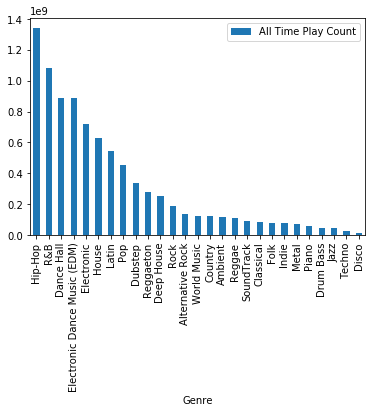

In [43]:
plt.figure(figsize=(100, 100))

df_allTimePlays.plot.bar(y='All Time Play Count')
plt.show()


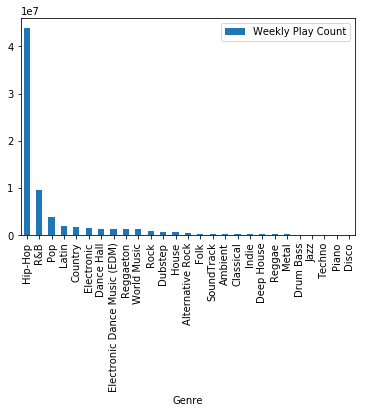

In [44]:
plt.figure(figsize=(100, 100))

df_weeklyPlays.plot.bar(y='Weekly Play Count')
plt.show()


In [66]:
final_weeklyPlaysdf.to_csv('outputs/allWeeklyPlays.csv', sep=',', index=True)
final_allTimePlaysdf.to_csv('outputs/allTimePlays.csv', sep=',', index=True)

In [ ]:
#scrape mongodb craigslist
#scrape mars

#final_weeklyPlaysdf.to_csv(f'outputs/allWeeklyPlays_{dt.date.today()}.csv', sep=',', index=True)
# final_allTimePlaysdf.to_csv(f'outputs/allTimePlays_{dt.date.today()}.csv', sep=',', index=True